In [1]:
####################################################

####      Plotting domain averaged OLR for all simulations

####################################################

In [2]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import glob
from tqdm.notebook import tqdm

In [3]:
case303=[
'SAM6108_RCE_MC_20221230_256x256',
'SAM6108_RCE_MC_20230818_256x256_e1_rank4',
'SAM6108_RCE_MC_20230818_256x256_e2_rank5',
'SAM6108_RCE_MC_20230818_256x256_e3_rank70',
'SAM6108_RCE_MC_20230818_256x256_e4_rank80',
'SAM6108_RCE_MC_20230818_256x256_e5_rank90',
'SAM6108_RCE_MC_20230818_256x256_e6_rank30',
'SAM6108_RCE_MC_20230818_256x256_e7_rank40',
'SAM6108_RCE_MC_20230818_256x256_e8_rank50',
'SAM6108_RCE_MC_20230818_256x256_e9_rank60',


'SAM6108_RCE_MC_20221230_256x256_DCa',
'SAM6108_RCE_MC_20230818_256x256_DCa_e1_rank4',
'SAM6108_RCE_MC_20230818_256x256_DCa_e2_rank5',
'SAM6108_RCE_MC_20230818_256x256_DCa_e3_rank70',
'SAM6108_RCE_MC_20230818_256x256_DCa_e4_rank80',
'SAM6108_RCE_MC_20230818_256x256_DCa_e5_rank90',
'SAM6108_RCE_MC_20230818_256x256_DCa_e6_rank30',
'SAM6108_RCE_MC_20230818_256x256_DCa_e7_rank40',
'SAM6108_RCE_MC_20230818_256x256_DCa_e8_rank50',
'SAM6108_RCE_MC_20230818_256x256_DCa_e9_rank60'
]

case300=[
'SAM6108_RCE_MC_20230905_256x256_e1_rank04',
'SAM6108_RCE_MC_20230905_256x256_e2_rank05',
'SAM6108_RCE_MC_20230905_256x256_e3_rank70',
'SAM6108_RCE_MC_20230905_256x256_e4_rank80',
'SAM6108_RCE_MC_20230905_256x256_e5_rank90',
'SAM6108_RCE_MC_20230905_256x256_e6_rank30',
'SAM6108_RCE_MC_20230905_256x256_e7_rank40',

'SAM6108_RCE_MC_20230905_256x256_DCa_e1_rank04',
'SAM6108_RCE_MC_20230905_256x256_DCa_e2_rank05',
'SAM6108_RCE_MC_20230905_256x256_DCa_e3_rank70',
'SAM6108_RCE_MC_20230905_256x256_DCa_e4_rank80',
'SAM6108_RCE_MC_20230905_256x256_DCa_e5_rank90',
'SAM6108_RCE_MC_20230905_256x256_DCa_e6_rank30',
'SAM6108_RCE_MC_20230905_256x256_DCa_e7_rank40'
]

In [4]:
import numpy as np
import xarray as xr

def calculate_OLR_daily(case_list, base_path='/fs3/group/mullegrp/Bidyut_Goswami/sam_data/', period=100):
    """
    Calculate OLR daily averages for given cases.

    Parameters:
    case_list (list): List of case names.
    base_path (str): Base path to the NetCDF files.
    period (int): Period for reshaping the OLR values.

    Returns:
    np.array: Array containing the OLR daily averages.
    """
    OLR_daily = []

    for case in case_list:
        path = f'{base_path}{case}/OUT_{case}/NETCDF_files/'
        f_in = f'{path}RCE_MC_{case}.nc'
        
        fin = xr.open_dataset(f_in)
        LWd = fin['RADLWDN']
        LWu = fin['RADLWUP']
        OLR_z = LWu - LWd
        OLR = OLR_z.mean(dim='z')

        OLRtmp = np.reshape(OLR.values, (int(OLR.shape[0] / period), period), order='F')
        OLR_d = np.mean(OLRtmp, axis=0)
        OLR_daily.append(OLR_d)

    totcase=len(case_list)
    ncase=int(totcase/2)
            
    return (np.array(OLR_daily),ncase)



In [5]:
OLR_daily_300, ncase300 = calculate_OLR_daily(case300)
OLR_daily_303, ncase303 = calculate_OLR_daily(case303)
print(OLR_daily_300.shape, ncase300)
print(OLR_daily_303.shape, ncase303)


(14, 100) 7
(20, 100) 10


In [6]:
daily_OLR_300_T=np.transpose(OLR_daily_300)
daily_OLR_303_T=np.transpose(OLR_daily_303)

In [7]:
st300=daily_OLR_300_T[:,:ncase300]
dc300=daily_OLR_300_T[:,ncase300:]

print(st300.shape)
print(dc300.shape)

(100, 7)
(100, 7)


In [8]:
st303=daily_OLR_303_T[:,:ncase303]
dc303=daily_OLR_303_T[:,ncase303:]

print(st303.shape)
print(dc303.shape)

(100, 10)
(100, 10)


In [9]:
#Calculating mean and standard deviation

#303
st303_sd=st303.std(axis=1)
st303_mn=st303.mean(axis=1)

dc303_sd=dc303.std(axis=1)
dc303_mn=dc303.mean(axis=1)

#300
st300_sd=st300.std(axis=1)
st300_mn=st300.mean(axis=1)

dc300_sd=dc300.std(axis=1)
dc300_mn=dc300.mean(axis=1)


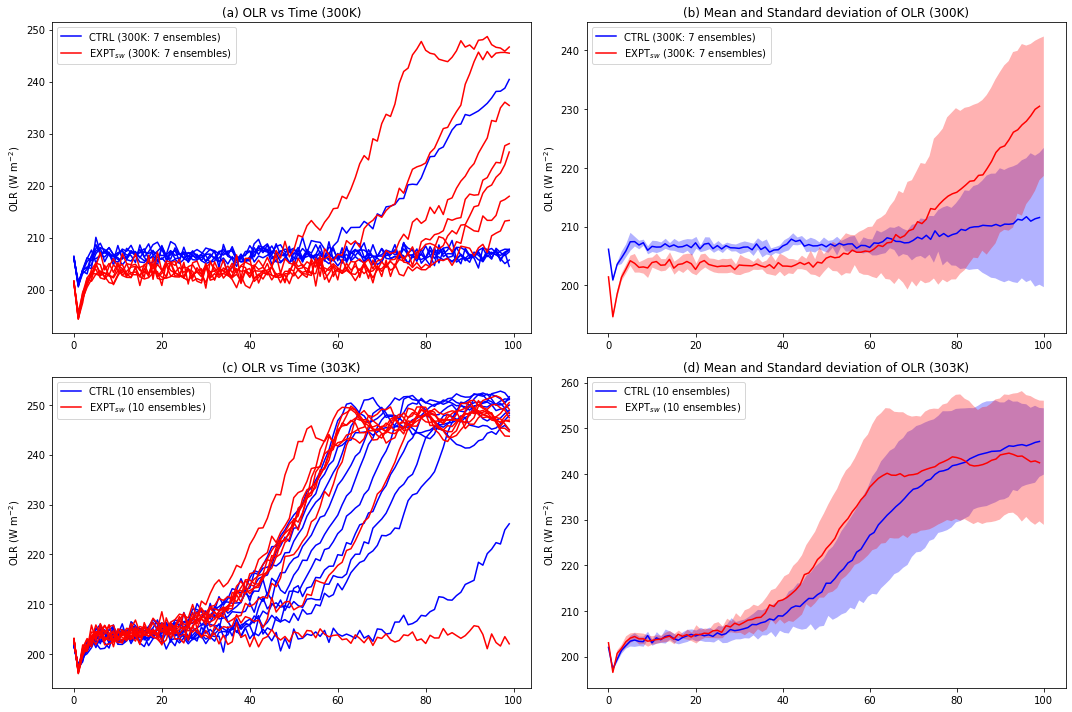

In [10]:
#Plot

t = np.linspace(0, 100, 100)  # Time axis

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: st300 and dc300 with legend
axs[0, 0].plot(st300, color='blue')
axs[0, 0].plot(dc300, color='red')
axs[0, 0].set_ylabel('OLR (W m$^{-2}$)')
axs[0, 0].set_title('(a) OLR vs Time (300K)')
# Adding legend manually
axs[0, 0].plot([], [], color='blue', label='CTRL (300K: 7 ensembles)')
axs[0, 0].plot([], [], color='red', label='EXPT$_{sw}$ (300K: 7 ensembles)')
axs[0, 0].legend()


# Plot 2: st300_mn, st300_sd, dc300_mn, and dc300_sd with fill_between
axs[0, 1].plot(st300_mn, color='blue', label='CTRL (300K: 7 ensembles)')
axs[0, 1].fill_between(t, st300_mn + st300_sd, st300_mn - st300_sd, facecolor='blue', alpha=0.3)
axs[0, 1].plot(dc300_mn, color='red', label='EXPT$_{sw}$ (300K: 7 ensembles)')
axs[0, 1].fill_between(t, dc300_mn + dc300_sd, dc300_mn - dc300_sd, facecolor='red', alpha=0.3)
axs[0, 1].set_ylabel('OLR (W m$^{-2}$)')
axs[0, 1].legend(loc='upper left')
axs[0, 1].set_title('(b) Mean and Standard deviation of OLR (300K)')

# Plot 3: st303 and dc303
axs[1, 0].plot(st303, color='blue')
axs[1, 0].plot(dc303, color='red')
axs[1, 0].set_ylabel('OLR (W m$^{-2}$)')
axs[1, 0].set_title('(c) OLR vs Time (303K)')
# Adding legend manually
axs[1, 0].plot([], [], color='blue', label='CTRL (10 ensembles)')
axs[1, 0].plot([], [], color='red', label='EXPT$_{sw}$ (10 ensembles)')
axs[1, 0].legend()

# Plot 4: st303_mn, st303_sd, dc303_mn, and dc303_sd with fill_between
axs[1, 1].plot(st303_mn, color='blue', label='CTRL (10 ensembles)')
axs[1, 1].fill_between(t, st303_mn + st303_sd, st303_mn - st303_sd, facecolor='blue', alpha=0.3)
axs[1, 1].plot(dc303_mn, color='red', label='EXPT$_{sw}$ (10 ensembles)')
axs[1, 1].fill_between(t, dc303_mn + dc303_sd, dc303_mn - dc303_sd, facecolor='red', alpha=0.3)
axs[1, 1].set_ylabel('OLR (W m$^{-2}$)')
axs[1, 1].legend(loc='upper left')
axs[1, 1].set_title('(d) Mean and Standard deviation of OLR (303K)')

plt.tight_layout()

#Saving figure
fig_directory='/fs3/home/bgoswami/work/20220913_SAM/SAM_Manuscript_01/Final_Figs'
figname="Figure_3"

plt.savefig(''+str(fig_directory)+'/'+str(figname)+'.svg', format="svg",transparent=True, dpi=1200)
!rsvg-convert -f pdf -o {fig_directory}/{figname}.pdf {fig_directory}/{figname}.svg
plt.show()
